In [2]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [47]:
provider = IBMQ.get_provider(group='open')
backendSimulator = provider.get_backend('ibmq_qasm_simulator')
backendReal = provider.get_backend('ibmq_16_melbourne')

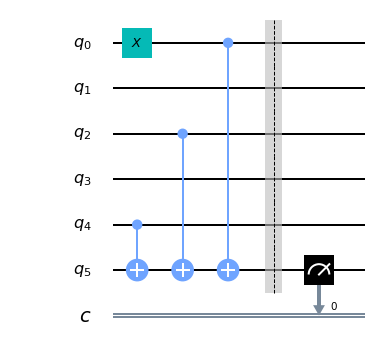

In [17]:
circ1 = QuantumCircuit(6,1)
circ1.x(0)
circ1.cnot(4,5)
circ1.cnot(2,5)
circ1.cnot(0,5)
circ1.barrier()
circ1.measure(5,0)
circ1.draw()

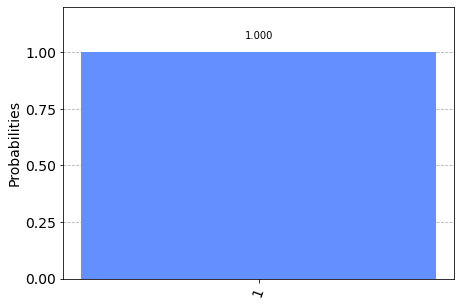

In [18]:
job = execute(circ1, backendSimulator)
result = job.result()
counts = result.get_counts(circ1)
plot_histogram(counts)

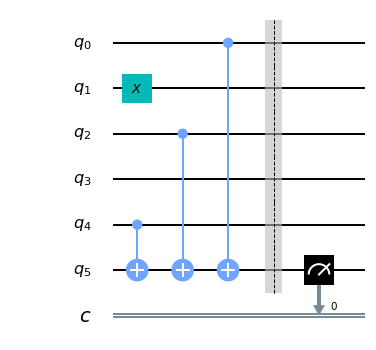

In [19]:
circ2 = QuantumCircuit(6,1)
circ2.x(1)
circ2.cnot(4,5)
circ2.cnot(2,5)
circ2.cnot(0,5)
circ2.barrier()
circ2.measure(5,0)
circ2.draw()

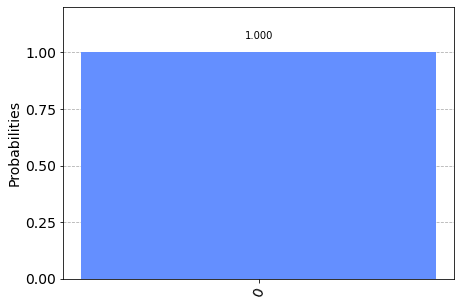

In [20]:
job = execute(circ2, backendSimulator)
result = job.result()
counts = result.get_counts(circ2)
plot_histogram(counts)

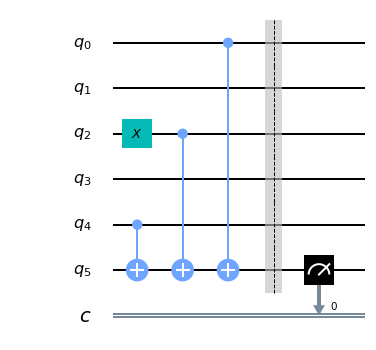

In [23]:
circ3 = QuantumCircuit(6,1)
circ3.x(2)
circ3.cnot(4,5)
circ3.cnot(2,5)
circ3.cnot(0,5)
circ3.barrier()
circ3.measure(5,0)
circ3.draw()

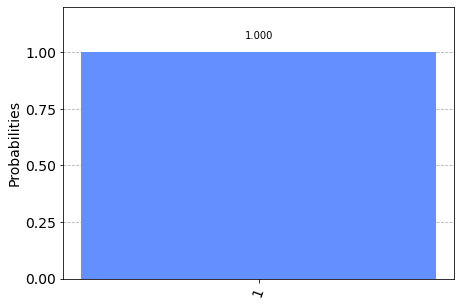

In [24]:
job = execute(circ3, backendSimulator)
result = job.result()
counts = result.get_counts(circ3)
plot_histogram(counts)

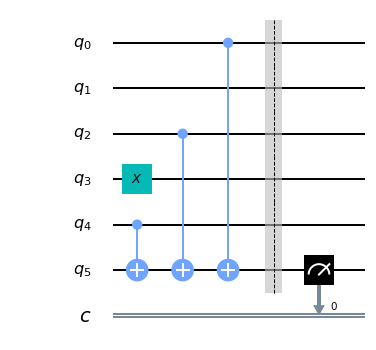

In [25]:
circ4 = QuantumCircuit(6,1)
circ4.x(3)
circ4.cnot(4,5)
circ4.cnot(2,5)
circ4.cnot(0,5)
circ4.barrier()
circ4.measure(5,0)
circ4.draw()

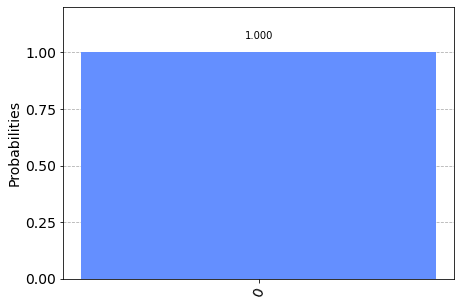

In [26]:
job = execute(circ4, backendSimulator)
result = job.result()
counts = result.get_counts(circ4)
plot_histogram(counts)

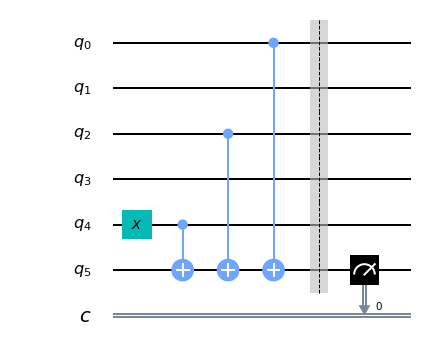

In [28]:
circ5 = QuantumCircuit(6,1)
circ5.x(4)
circ5.cnot(4,5)
circ5.cnot(2,5)
circ5.cnot(0,5)
circ5.barrier()
circ5.measure(5,0)
circ5.draw()

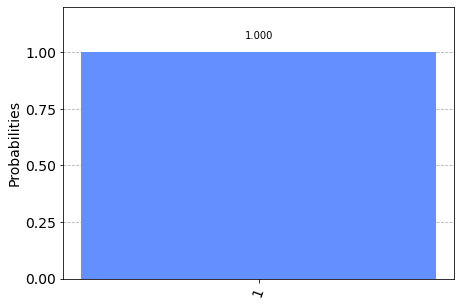

In [29]:
job = execute(circ5, backendSimulator)
result = job.result()
counts = result.get_counts(circ5)
plot_histogram(counts)

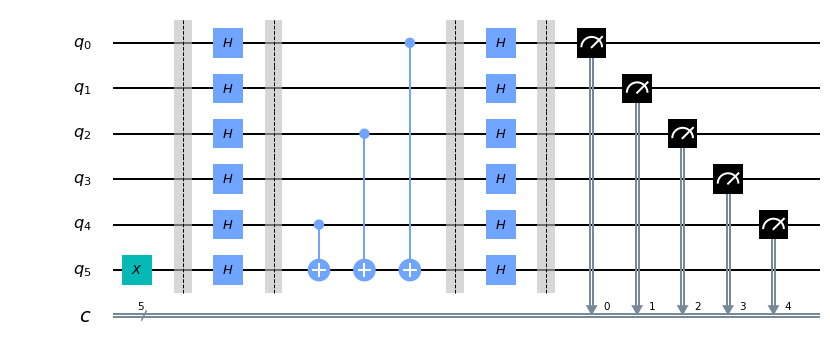

In [44]:
circ6 = QuantumCircuit(6,5)
circ6.x(5)
circ6.barrier()
circ6.h([0,1,2,3,4,5])
circ6.barrier()
circ6.cnot(4,5) #bramka obliczeniowa Uf
circ6.cnot(2,5) #bramka obliczeniowa Uf
circ6.cnot(0,5) #bramka obliczeniowa Uf
circ6.barrier()
circ6.h([0,1,2,3,4,5])
circ6.barrier()
circ6.measure(0,0)
circ6.measure(1,1)
circ6.measure(2,2)
circ6.measure(3,3)
circ6.measure(4,4)
circ6.draw()

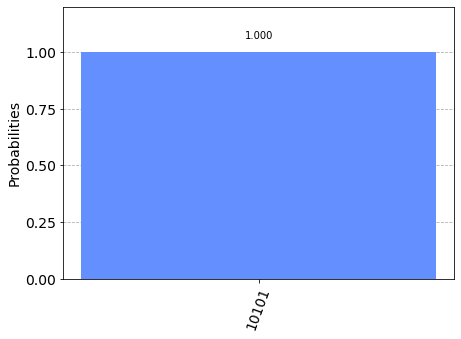

In [45]:
job = execute(circ6, backendSimulator)
result = job.result()
counts = result.get_counts(circ6)
plot_histogram(counts)

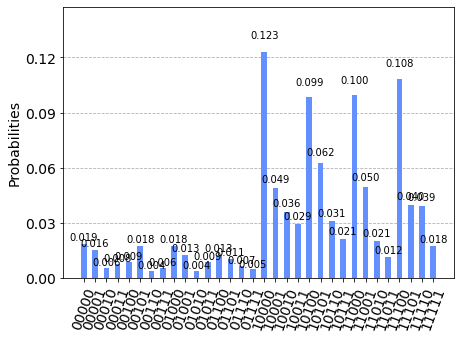

In [48]:
job = execute(circ6, backendReal)
result = job.result()
counts = result.get_counts(circ6)
plot_histogram(counts)

Problem polega na tym, że mamy funkcję f, ale nieznamy jej parametru a. Ile razy musimy uruchomić tę
funkcję, żeby dowiedzieć się, ile wynosi a?
Bramka obliczenowa została zaznaczona w kodzie.
Rozwiązanie klasyczne realizujemy poprzez wielokrotne uruchomienie, stawiąjąc w każdym kolejnym uruchomieniu wartość 1 na kolejnej pozycji. Dzięki temu, po wielokrotnym uruchomieniu jesteśmy w stanie wywniosować całkowitą wartość A.
Rozwiązanie kwantowe realizujemy budując bramkę Uf realizującą funkcję. Następnie stosujemy metodę obkładania Hadamardami, które odwacają wszystkie CNOTy. Ustawiamy 1 na rejestrze wyjściowym, dzięki temu włączamy wszystkie CNOTy. Dzięki temu jesteśmy w stanie dowiedzieć się jaka jest wartość A po jednym uruchomieniu.

W rozwiązaniu klasycznym otrzymujemy po jednej wartości po kolei na qubicie wyjściowym. Zebrane wyniki zgadzają się z prawdą. Wynoszą 10101.
W rozwiązaniu kwantowym otrzymujemy w jednym uruchomieniu wszystkie wartości na qubitach wejściowych. Wynik się zgadza, wynosi 10101.

Wynik symulatora oraz wynik prawdziwego komputera kwantowego nie jest zgodny. Prawdopodobieństwo oczekiwanego wyniku wyniosło około 6%.